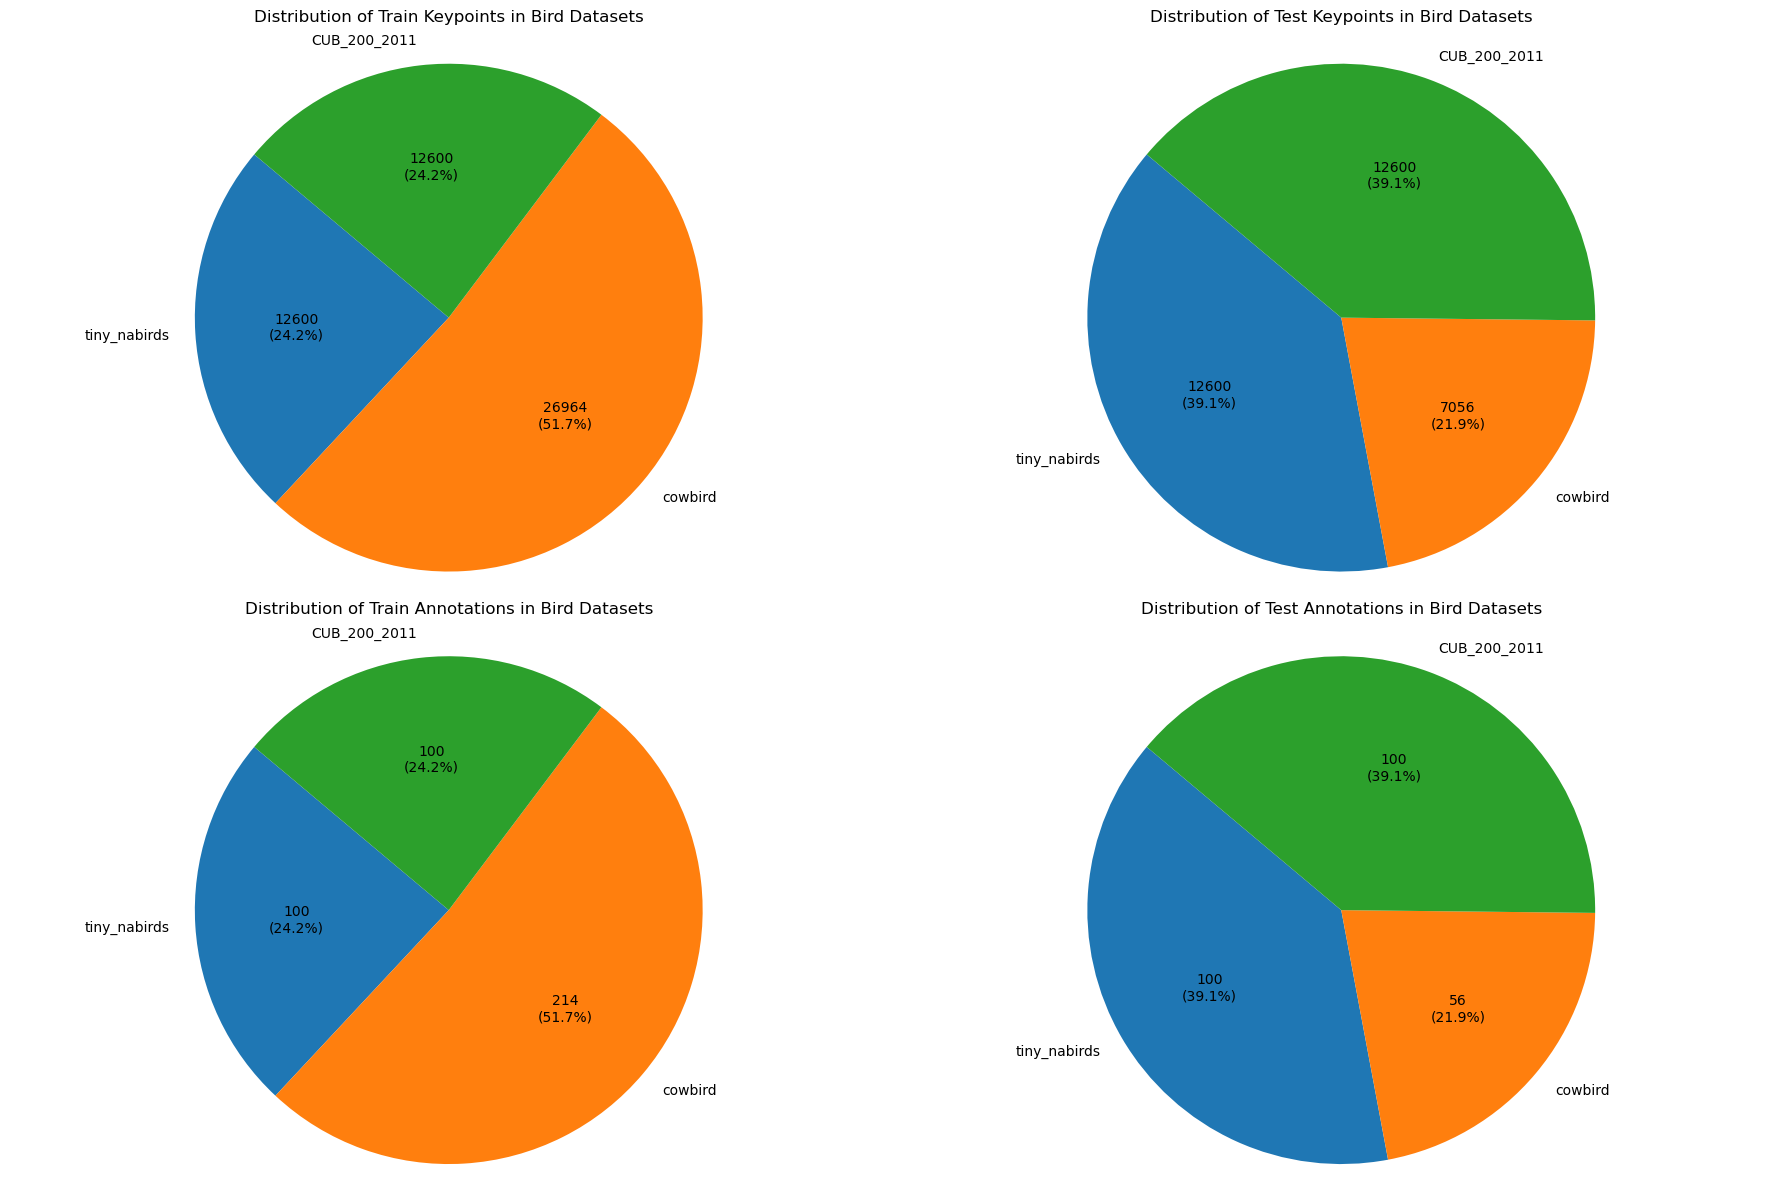

In [3]:
import json
import matplotlib.pyplot as plt

# Load the uploaded JSON files
#Change the root to your directory
root = "/Users/annastuckert/Documents/DLC_AI_Residency/DLC_AI2024/Bird_datasets_merged"
train_file_path = f"{root}/annotations/train.json"
test_file_path = f"{root}/annotations/test.json"

with open(train_file_path, 'r') as file:
    train_data = json.load(file)

with open(test_file_path, 'r') as file:
    test_data = json.load(file)

# Function to count keypoints and annotations
def count_keypoints_annotations(data):
    annotations_by_dataset = {}
    keypoints_by_dataset = {}

    for anno in data['annotations']:
        image_id = anno['image_id']
        image_info = next(item for item in data['images'] if item['id'] == image_id)
        dataset = image_info['source_dataset']
        
        if dataset not in annotations_by_dataset:
            annotations_by_dataset[dataset] = 0
            keypoints_by_dataset[dataset] = 0
        annotations_by_dataset[dataset] += 1
        if 'keypoints' in anno:
            keypoints_by_dataset[dataset] += len(anno['keypoints'])
    
    return annotations_by_dataset, keypoints_by_dataset

# Count keypoints and annotations for train and test datasets
train_annotations_by_dataset, train_keypoints_by_dataset = count_keypoints_annotations(train_data)
test_annotations_by_dataset, test_keypoints_by_dataset = count_keypoints_annotations(test_data)

# Helper function to format the pie chart labels
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}\n({pct:.1f}%)'
    return my_autopct

# Prepare data for pie charts
train_keypoints_labels = list(train_keypoints_by_dataset.keys())
train_keypoints_sizes = list(train_keypoints_by_dataset.values())

test_keypoints_labels = list(test_keypoints_by_dataset.keys())
test_keypoints_sizes = list(test_keypoints_by_dataset.values())

train_annotations_labels = list(train_annotations_by_dataset.keys())
train_annotations_sizes = list(train_annotations_by_dataset.values())

test_annotations_labels = list(test_annotations_by_dataset.keys())
test_annotations_sizes = list(test_annotations_by_dataset.values())

# Plot the pie charts in a grid
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Adjust the spacing at the top to avoid overlap
fig.subplots_adjust(top=0.85)

# Train keypoints pie chart
axs[0, 0].pie(train_keypoints_sizes, labels=train_keypoints_labels, autopct=autopct_format(train_keypoints_sizes), startangle=140, textprops={'fontsize': 10})
axs[0, 0].axis('equal')
axs[0, 0].set_title('Distribution of Train Keypoints in Bird Datasets', pad=20)

# Test keypoints pie chart
axs[0, 1].pie(test_keypoints_sizes, labels=test_keypoints_labels, autopct=autopct_format(test_keypoints_sizes), startangle=140, textprops={'fontsize': 10})
axs[0, 1].axis('equal')
axs[0, 1].set_title('Distribution of Test Keypoints in Bird Datasets', pad=20)

# Train annotations pie chart
axs[1, 0].pie(train_annotations_sizes, labels=train_annotations_labels, autopct=autopct_format(train_annotations_sizes), startangle=140, textprops={'fontsize': 10})
axs[1, 0].axis('equal')
axs[1, 0].set_title('Distribution of Train Annotations in Bird Datasets', pad=20)

# Test annotations pie chart
axs[1, 1].pie(test_annotations_sizes, labels=test_annotations_labels, autopct=autopct_format(test_annotations_sizes), startangle=140, textprops={'fontsize': 10})
axs[1, 1].axis('equal')
axs[1, 1].set_title('Distribution of Test Annotations in Bird Datasets', pad=20)

plt.tight_layout()
plt.show()
